In [36]:
import pandas as pd
import numpy as np
import pandas_profiling.profile_report as pf
from plotly import express as ex

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Benkyou/datasets ML/diabetes (1).csv")
data.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Statistical modeling


In [8]:
data.describe()

preg        plas        pres  ...        mass        pedi         age
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...   31.992578    0.471876   33.240885
std      3.369578   31.972618   19.355807  ...    7.884160    0.331329   11.760232
min      0.000000    0.000000    0.000000  ...    0.000000    0.078000   21.000000
25%      1.000000   99.000000   62.000000  ...   27.300000    0.243750   24.000000
50%      3.000000  117.000000   72.000000  ...   32.000000    0.372500   29.000000
75%      6.000000  140.250000   80.000000  ...   36.600000    0.626250   41.000000
max     17.000000  199.000000  122.000000  ...   67.100000    2.420000   81.000000

[8 rows x 8 columns]

In [9]:
data[["plas","pres","skin","insu","mass"]]=data[["plas","pres","skin","insu","mass"]].replace(0,np.NaN)

In [10]:
data.isna().sum()

preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [11]:
data.fillna(data.mean(),inplace=True)

In [12]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [13]:
data['class'],srijith=pd.factorize(data['class'])
print(srijith)

Index(['tested_positive', 'tested_negative'], dtype='object')


In [14]:
data['skin'] = data['skin'].replace(0,20.53645)

In [15]:
data.head()

preg   plas  pres      skin        insu  mass   pedi  age  class
0     6  148.0  72.0  35.00000  155.548223  33.6  0.627   50      0
1     1   85.0  66.0  29.00000  155.548223  26.6  0.351   31      1
2     8  183.0  64.0  29.15342  155.548223  23.3  0.672   32      0
3     1   89.0  66.0  23.00000   94.000000  28.1  0.167   21      1
4     0  137.0  40.0  35.00000  168.000000  43.1  2.288   33      0

In [16]:
data.describe()

preg        plas        pres  ...        pedi         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  121.686763   72.405184  ...    0.471876   33.240885    0.651042
std      3.369578   30.435949   12.096346  ...    0.331329   11.760232    0.476951
min      0.000000   44.000000   24.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.750000   64.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.202592  ...    0.372500   29.000000    1.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]

In [17]:
class Scaler:
  def MinMaxScaler(self,datacolumn):
    self.min,self.max=min(datacolumn),max(datacolumn)
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.min)/(self.max-self.min)
    
    return datacolumn
  
  def StandardScaler(self,datacolumn):
    self.var,self.mean = datacolumn.var(),(datacolumn.mean())
    for i in range(len(datacolumn)):
      datacolumn[i] = (datacolumn[i]-self.mean)/np.sqrt((self.var))
    return datacolumn

In [18]:
feature_names=data.columns.to_list()
feature_names.remove('class')

In [19]:
# scale=Scaler()
# for i in feature_names:
#   data[i]=scale.MinMaxScaler(data[i])

In [20]:
x=data[feature_names]
y=data['class']

In [21]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [ ]:
pip install pandas_profiling --upgrade

In [31]:
profile = pf.ProfileReport(data,title= 'Diabetes Classification',explorative=True)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
xtrain,ytrain,xtest,ytest = split_test_train(x,y,train_size=0.80,seed=0)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (614, 8) y=  (614,) 
Test data shapes
x = (154, 8) y = (154,)


#Naive Bayes From SKLEARN 

In [32]:
from sklearn.naive_bayes import GaussianNB 

In [33]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
ypred = nb.predict(xtest)
print('PREDICTED',ypred,'\nTRUE',ytest)

PREDICTED [1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.] 
TRUE [1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



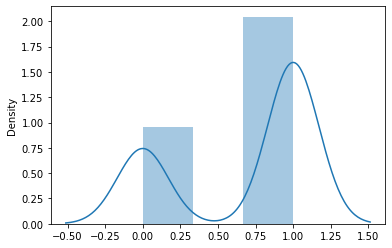

In [42]:
import seaborn as sns
sns.distplot(ytest)

In [43]:
from sklearn.metrics import accuracy_score as asc

In [45]:
print('Accuracy ==>',asc(ytest,ypred)*100,'%')

Accuracy ==> 72.72727272727273 %


#Naive Bayes From Scratch

In [62]:
class NaiveBayes:
    def fit(self,X,y):
        '''need mean variance for eachclass samples = rows ,feauture = column'''
        n_samples , n_feature = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        #init mean ,var ,prior prob
        self._mean = np.zeros((n_classes,n_feature),dtype = np.float64)
        self._var =  np.zeros((n_classes,n_feature),dtype = np.float64)
        self._priors = np.zeros((n_classes),dtype = np.float64)
        self._classes,_ =pd.factorize(self._classes)
        #for this im getting zeor division error 
        '''for i in range(len(self._classes)):
          if self._classes[i]== 0:
            self._classes[i] = 3'''


        for c in self._classes:
          X_c =X[c==y]
          self._mean[c,:] =X_c.mean(axis=0)
          self._var[c,:] =X_c.var(axis =0)
          self._prior = X_c.shape[0]/float(n_samples)
    
    def predict(self,X):
      '''predict class conditional'''
      y_pred =[self._predict(i) for i in X]
      return y_pred

    def _predict(self ,x):
      posteriors =[]

      for j,c in enumerate(self._classes):
        prior = np.log(self._priors[j])
        class_conditional = np.sum(np.log(self._density(j,x)))
        posterior =prior + class_conditional
        posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]
            
    def _density(self,class_index ,x):
      mean = self._mean[class_index]
      var =self._var[class_index]
      numerator = np.exp(-(x-mean)**2/(2*var))
      denomi =np.sqrt(2*np.pi*var)
      return numerator/denomi

In [63]:
nbs = NaiveBayes()
nbs.fit(xtrain,ytrain)

In [64]:
ypredicted = nbs.predict(xtest)
ypredicted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning:

divide by zero encountered in log



[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]